# HOMEWORK 1

Lucrezia Rossi  
Matricola 2122164

## Exercise 1

Consider the coin tossing example, discussed in the first lecture. Simulate
1000 tosses of the coins, setting $H=0.3$. Consider a uniform prior and
update the posterior at each toss. Plot the resulting posterior after 1, 50,
100, 300, 700, 1000 tosses. Repeat the simulated experiment by setting
a Gaussian prior centered in $H=0.5$, with standard deviation $\sigma=0.1$.
Do both posteriors converge a similar distribution in the end? What does
that mean? Which posterior converges faster and why?

We'll observe which prior allows for faster convergence and what the end results imply about the nature of prior information.

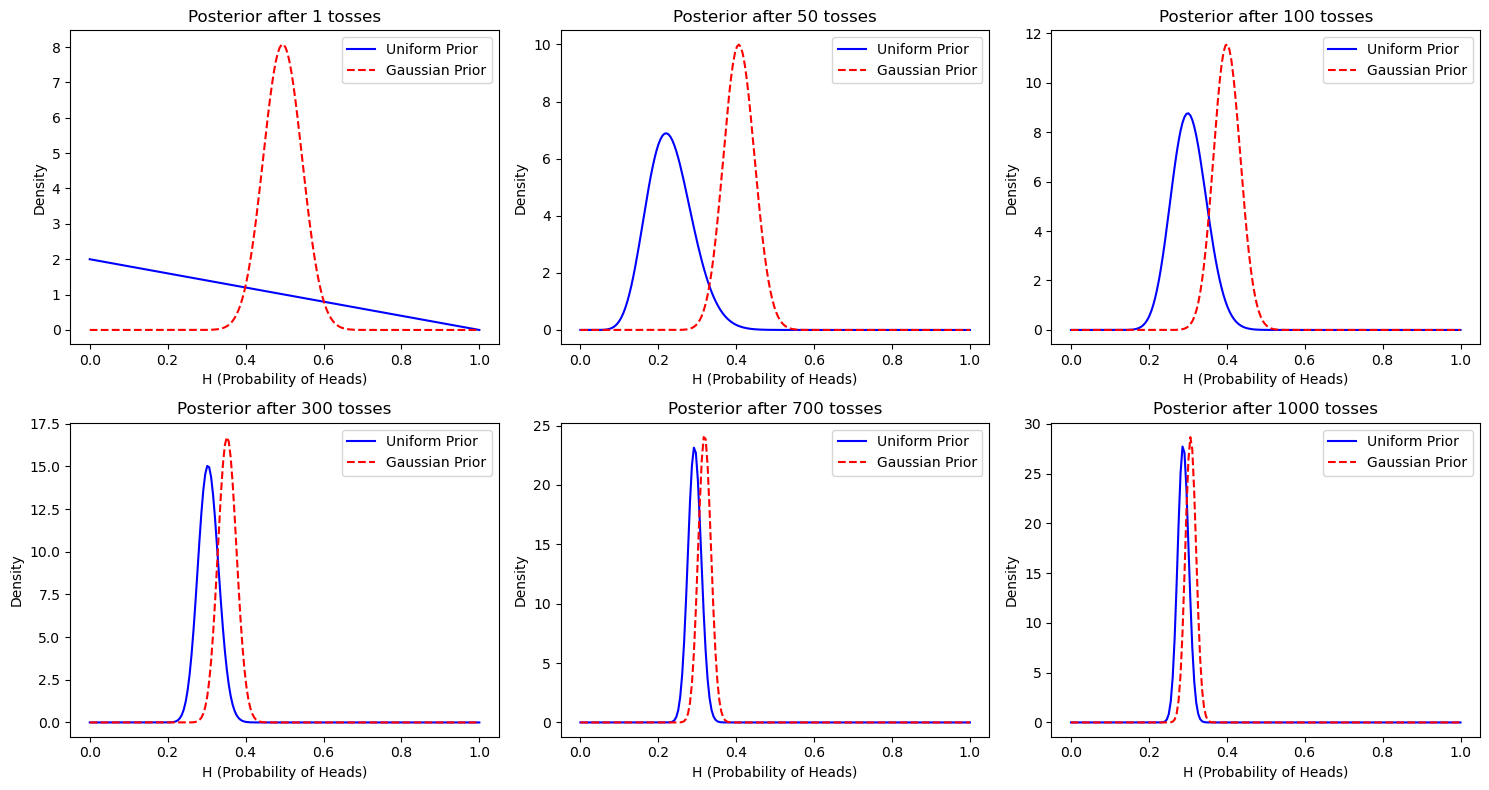

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

true_H = 0.3                 # True probability of heads
num_tosses = 1000            # Number of coin tosses
np.random.seed(42)         

# Simulate coin tosses
tosses = np.random.binomial(1, true_H, num_tosses)

# Prior settings
uniform_alpha, uniform_beta = 1, 1                        # Uniform prior
gaussian_prior_mean, gaussian_prior_std = 0.5, 0.1        # Gaussian prior

uniform_alpha_posterior = uniform_alpha
uniform_beta_posterior = uniform_beta

# Number of tosses
posterior_updates = [1, 50, 100, 300, 700, 1000]

gaussian_alpha_posterior = (gaussian_prior_mean * (1 / gaussian_prior_std ** 2)) + uniform_alpha
gaussian_beta_posterior = ((1 - gaussian_prior_mean) * (1 / gaussian_prior_std ** 2)) + uniform_beta

uniform_posteriors = {}
gaussian_posteriors = {}

# Bayesian updating
for i in range(1, num_tosses + 1):
    heads = np.sum(tosses[:i])
    tails = i - heads
    
    # Update Uniform posterior
    uniform_alpha_posterior = uniform_alpha + heads
    uniform_beta_posterior = uniform_beta + tails
    
    # Update Gaussian posterior
    gaussian_alpha_posterior = uniform_alpha + (heads + (gaussian_prior_mean * (1 / gaussian_prior_std ** 2)))
    gaussian_beta_posterior = uniform_beta + (tails + ((1 - gaussian_prior_mean) * (1 / gaussian_prior_std ** 2)))
    
    # Store posteriors at specified points
    if i in posterior_updates:
        h_range = np.linspace(0, 1, 200)
        uniform_posteriors[i] = beta.pdf(h_range, uniform_alpha_posterior, uniform_beta_posterior)
        gaussian_posteriors[i] = beta.pdf(h_range, gaussian_alpha_posterior, gaussian_beta_posterior)

# Plotting posteriors
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
h_range = np.linspace(0, 1, 200)
for j, update in enumerate(posterior_updates):
    ax = axs[j // 3, j % 3]
    ax.plot(h_range, uniform_posteriors[update], label="Uniform Prior", color='blue')
    ax.plot(h_range, gaussian_posteriors[update], label="Gaussian Prior", color='red', linestyle='--')
    ax.set_title(f'Posterior after {update} tosses')
    ax.set_xlabel('H (Probability of Heads)')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


By the end of 1000 tosses, both priors lead to a similar posterior distribution, centered around the true value $H=0.3$.
This convergence suggests that, with enough data, the influence of the initial prior diminishes, and the posterior closely reflects the likelihood based on the observed data.

The Gaussian prior (centered at $H=0.5$ with $\sigma=0.1$) leads to a slower convergence toward the true value of $H=0.3$ initially, as it starts with a more biased initial belief.
The uniform prior converges more quickly because it assumes no initial bias towards any value, allowing the data to drive the posterior updates.

In conclusion the experiment demonstrates that, while different priors may influence the rate of convergence, both priors eventually yield similar posteriors with enough data. This aligns with the Bayesian principle that with different priors on the same dataset we conserge as the same posterior.
In applications where faster convergence to the true parameter is needed, choosing an uninformative or less biased prior (such as a uniform prior) can be beneficial if there is no strong prior information.